## To-do Functions:
- Read sto file.     x
- Read a directory with sto files     x
- Extract sequence and head.    x
- recognize different types of information from the file.     x
- Make graph.    x
- Create new text file and write seqs and the different relations into it.  x
- Create graphs with different type of information (user entry).    x
- Create target file. x

In [1]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
import ntpath
from eden.util import display

In [2]:
"""read a Sto file separate the head and the sequence"""
def _readStoFile(file_path =None):
    head_mark0 = '#'
    head_mark1 = '='
    head_mark2 = 'G'
    head_mark3 = 'C'
    head_list = []
    sequence_list = []  
    
    #""" for file in os.listdir(path): #open file """
    read_file = open(file_path ,'r') 
    for line in read_file: 
        lines = list(line)
            # the read line is the head of the sequence write it in head list
        if lines[0] == head_mark0 and lines[1] == head_mark1 and lines[2] == head_mark2 and lines[3] == head_mark3:
            line = line.strip('#=GC ')            
            line = line.strip('\n')
            line = line.split(' ')
            line = filter(None, line)

            head = line[0]
            head_list.append(head)
            sequence = line[1].split()
            sequence_list.append(sequence)
            zip_head_seqs = zip(head_list, sequence_list)
      
    return zip_head_seqs

In [3]:
"""Recognize the different types of information (cons, sscons, consSS, entropy, cov)"""
def _identifyInformationType(file_name, head_seq_list):

    secondery_structure_s = []
    conservation_s = []
    conservation_stringth_s = []
    entropy_0_s = []
    entropy_1_s = []
    entropy_2_s = []
    entropy_3_s = []
    coveriation_s = []

    for i, elemant in enumerate(head_seq_list):
        info_item = head_seq_list[i]
        
        if info_item[0] == 'SS_cons':
            secondery_structure_s.append(str(info_item[1]))
            
        if info_item[0] == 'cons':
            conservation_s.append(str(info_item[1]))
            
        if info_item[0] == 'conss':
            conservation_stringth_s.append(info_item[1])
            
        if info_item[0] == 'col_entropy_0':
            entropy_0_s.append(info_item[1])
            
        if info_item[0] == 'col_entropy_1':
            entropy_1_s.append(info_item[1])

        if info_item[0] == 'col_entropy_2':
            entropy_2_s.append(info_item[1])
            
        if info_item[0] == 'col_entropy_3':
            entropy_3_s.append(info_item[1])   
            
        if info_item[0] == 'cov_SS_cons':
            coveriation_s.append(info_item[1])
    file_dictionary = {"ID_file name": file_name, "conservation": conservation_s, "secondery_structure": secondery_structure_s,
                       "conservation_stringth": conservation_stringth_s, "entropy_3": entropy_3_s, "covariation": coveriation_s}
    return file_dictionary

In [4]:
def _filterInfo(info_type):
    sequence = info_type['conservation']
    structure = info_type['secondery_structure']
    conservation_stringth = info_type['conservation_stringth']
    covariation = info_type['covariation']
    entropy_3 = info_type['entropy_3']

    sequence = sequence[0].strip('[\']')
    print ('seq', sequence)
    structure = structure[0].strip('[\']')
    print ('stru', structure)
    conservation_stringth = str(conservation_stringth[0]).strip('[\']')
    covariation = str(covariation).strip('[\']')
    entropy_3 = str(entropy_3[0]).strip('[\']')

    zip_info_type = zip(sequence,conservation_stringth,covariation,entropy_3)
    return sequence, structure, conservation_stringth, covariation, entropy_3
    #return zip_info_type, structure

In [5]:
'''Recognize basepairs and include them to the generated graph'''
def _buildGraph(head, sequence, structure, conservation_stringth, covariation, entropy_3):
    
    print ("Graph title", head)
    #print zip_all_info
    open_pran = "<" or "(" or "[" or "{"
    close_pran = ">" or ")" or "]" or "}"
    stack_o = []
    stack_pos_o =[]
    stack_c = []
    G = nx.Graph()

    #G.graph['sequence']= sequence
    #G.graph['covariation']= covariation

    for i, k in enumerate(structure):
        
        #node labeled with all info
        seqCovConssEnt = sequence[i] + covariation[i] + conservation_stringth[i] + entropy_3[i]
        G.add_node(i, label = seqCovConssEnt)
        
        # connect with the next node 
        if i > 0:
            G.add_edge(i-1, i, label= 'x')
           
        """find basepair and connect them"""
        if structure[i] == open_pran:
            j = i
            stack_o.append(structure[j])
            stack_pos_o.append(j)
            open_len = len(stack_o)

        if structure[i] == close_pran:
            stack_c.append(structure[i])
            stack_o.pop()
            j = stack_pos_o.pop()
            G.add_edge(i, j, label = 'b')

    return G 

In [ ]:
'''Transform the big graph to the wanted graph'''
def _transformGraph(G, graphParmeter):
    for u in G.nodes():
        G.node[u]=G.node[u]['seq']+’_’+G.node[u]['cov']

    

In [6]:
'''Recognize basepairs and include them to the generated graph'''
def _buildListGraph(head, sequence, structure, conservation_stringth, covariation, entropy_3):
    
    #print ("Graph title", head)
    #print zip_all_info
    open_pran = "<" or "(" or "[" or "{"
    close_pran = ">" or ")" or "]" or "}"
    stack_o = []
    stack_pos_o =[]
    stack_c = []
    G = nx.Graph()
    H = nx.Graph()
    
    for i, k in enumerate(structure):
        
        G.add_node(i, label = sequence[i])
        H.add_node(i, label = covariation[i])
        
        # connect with the next node 
        if i > 0:
            G_edge = G.add_edge(i-1, i, label= 'x')
            H_edge = H.add_edge(i-1, i, label= 'y')

           
        """find basepair and connect them"""
        if structure[i] == open_pran:
            j = i
            stack_o.append(structure[j])
            stack_pos_o.append(j)
            open_len = len(stack_o)

        if structure[i] == close_pran:
            stack_c.append(structure[i])
            stack_o.pop()
            j = stack_pos_o.pop()
            G.add_edge(i, j, label = 'b')
            H.add_edge(i, j, label = 'b')
            
    U = nx.disjoint_union(G, H)
   
    return U 

In [7]:
'''generate target files'''
def _createTargetFiles(files_dir, partition_dir, output_dir):
    pos_partition_file = "positive-partitions-test.tab"
    neg_partition_file = "negative-partitions-test.tab"
    file_extention = '.target'
    output_file_name = 'data'
    
    target_file_name = output_dir + "/" + output_file_name + file_extention

    tab_list = os.listdir(partition_dir)
    for tab_file in os.listdir(partition_dir):
        target_file = open(target_file_name, 'a')
                            
        if tab_file == pos_partition_file:
            read_pos_tab = open(os.path.join(partition_dir, tab_file), 'r')
            for line in read_pos_tab:
                line_parts= line.split()
                file_class_num = line_parts[1]
                
                '''write 1 if calss 0 in target file'''
                if file_class_num == '0':
                    target_file.write('1\n')
                '''write -1 if calss 1 in target file'''
                if file_class_num == '1':
                    target_file.write('-1\n')
           
        if tab_file == neg_partition_file:
            '''open partition file'''
            read_neg_tab = open(os.path.join(partition_dir, tab_file), 'r')
            for line in read_neg_tab:
                line_parts= line.split()
                file_class_num = line_parts[1]

                '''write 1 if calss 0 in target file'''
                if file_class_num == '0':
                    target_file.write('1\n')
                '''write -1 if calss 1 in target file'''
                if file_class_num == '1':
                    target_file.write('-1\n')
    target_file.close()

## Experiments:

In [8]:
#directory = "/home/alsheikm/GitDir/EeDN_work/StoExamples/StoExmapleSmall"
def _readFolderAndGraphsGenerating(directory = None):
    for folder_name in os.listdir(directory):
        print ('folder_name:', folder_name)
        folder_path = os.path.join(directory, folder_name)
        #print ('folder_path', folder_path)
        for file_name in os.listdir(folder_path):
            print ('file_name', file_name)
            head = ntpath.splitext(ntpath.basename(file_name))[0]
            file_complete_path = os.path.join(folder_path, file_name)
            zip_head_seqs = _readStoFile(file_complete_path)
            info_type = _identifyInformationType(head, zip_head_seqs)
            sequence, structure, conservation_stringth, covariation, entropy_3 = _filterInfo(info_type)
            #print structure
            G = _buildGraph(head, sequence, structure, conservation_stringth, covariation, entropy_3)
            display.draw_graph(G, size=40, node_size=400, font_size=20, node_border=True, prog='neato', title_key= 'head')

('folder_name:', 'positives-sto')
('file_name', '550-70730-0-0.sto')
('seq', 'Cnn---n--n-n-Rnnn--nn-nn-n---YYG----R--ACUGGUUCGnRAACnUCCCAGU')
('stru', '<<<...<.<<.<._____.__.>>>>...>>>....-..-<<<<____________>>>>:')
('Graph title', '550-70730-0-0')


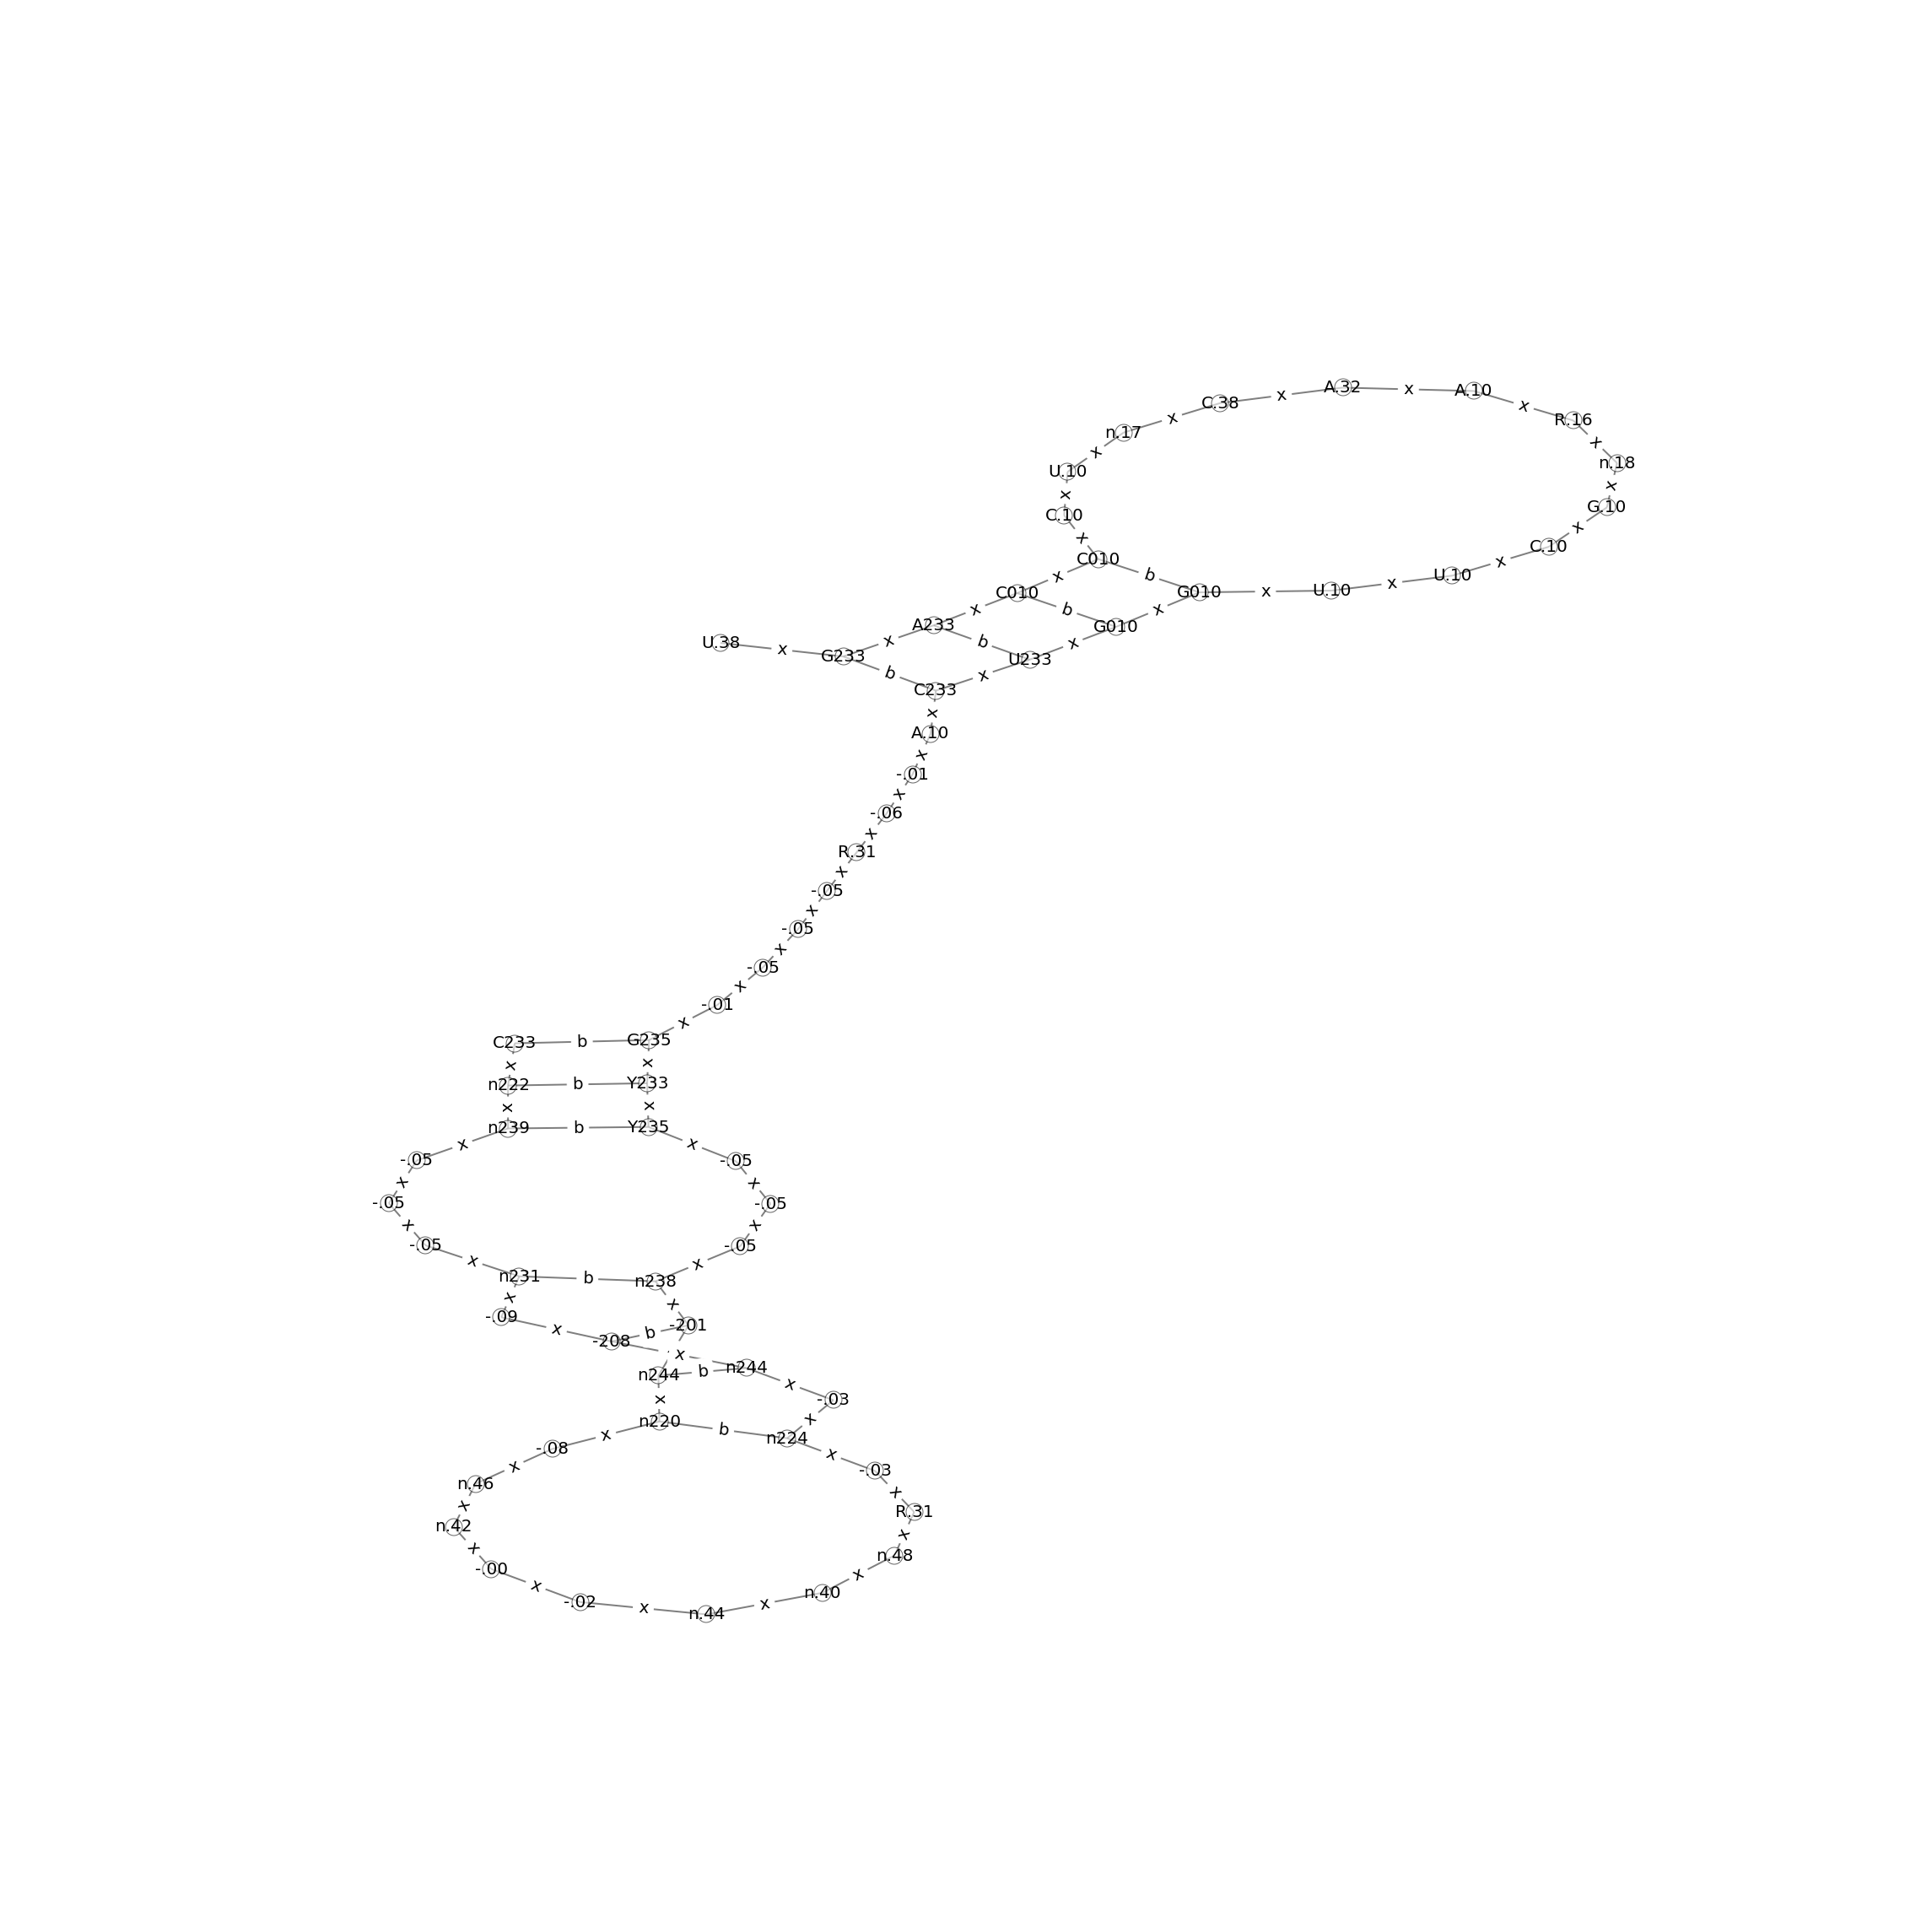

('file_name', '550-53949-1-0.sto')
('seq', 'nnCC-nGn-CCGGGCCCCUCUGGCAGYnC--n--Ann--GnRCUGYGAUGUCGGA-YUGGnn')
('stru', '<<<<.<<-.<<<<---------<<<<<<<.._.._._..>>>>>>>---->>>>-.>>>>>>')
('Graph title', '550-53949-1-0')


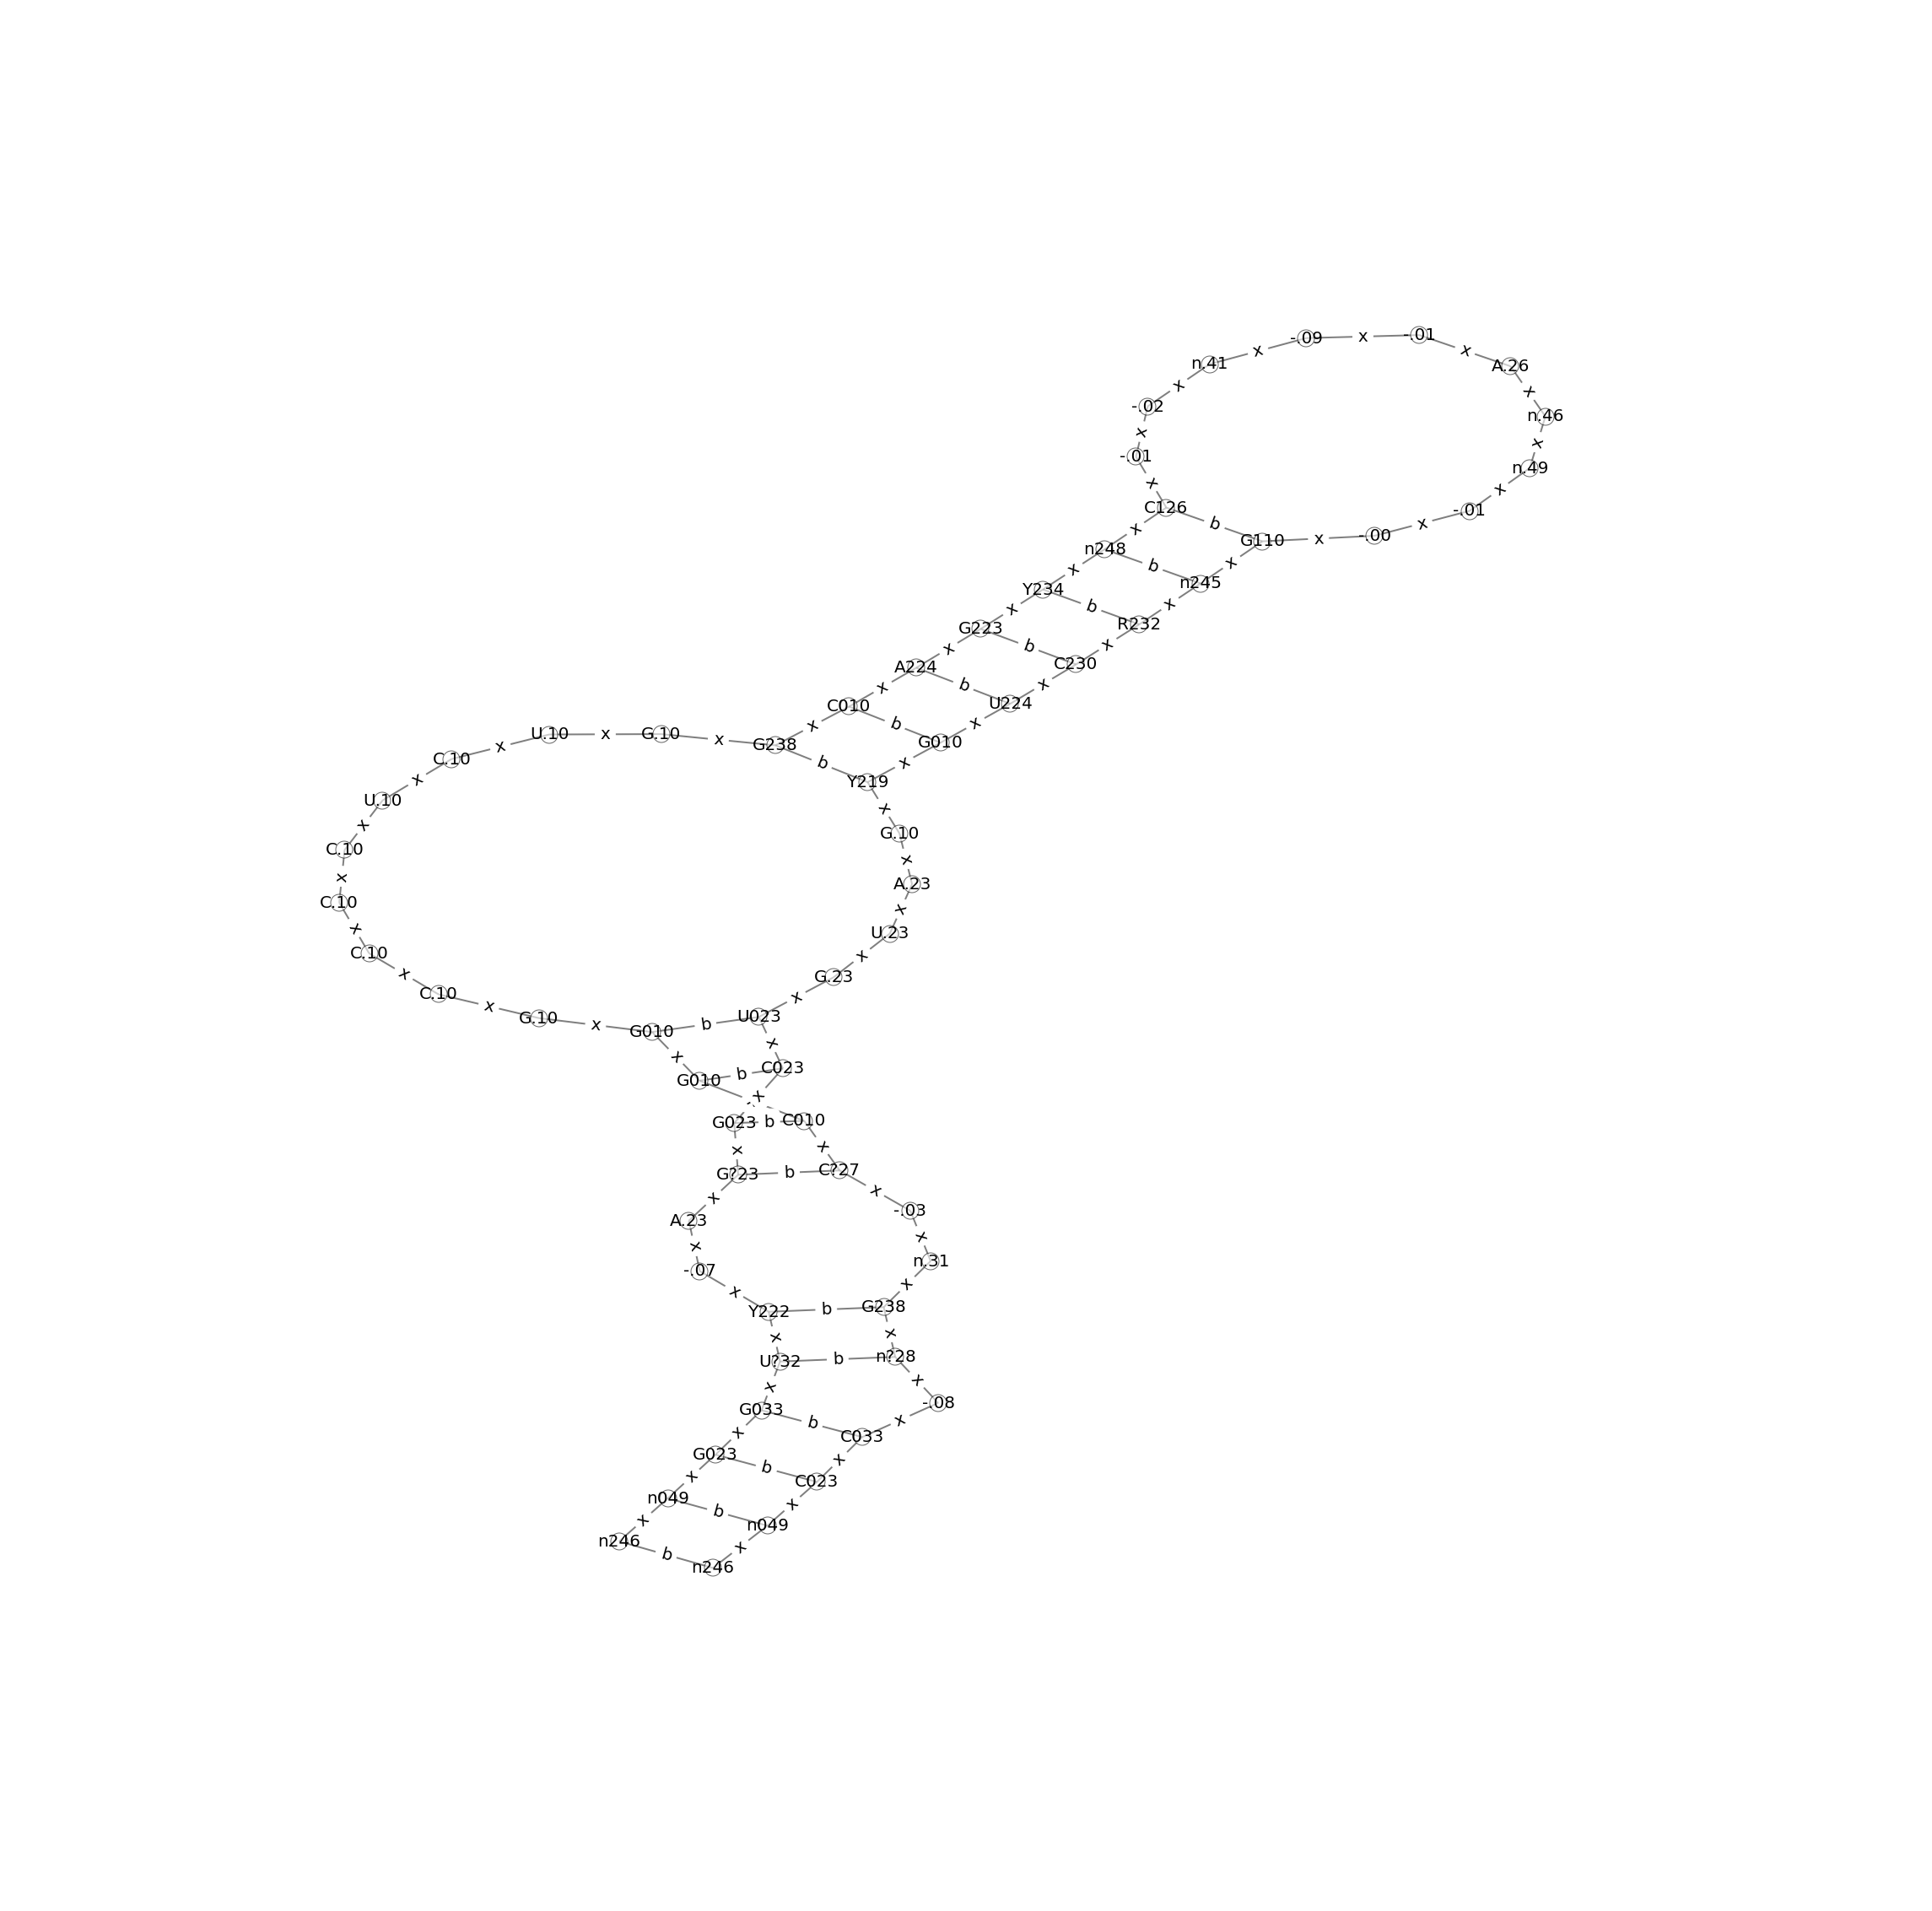

('file_name', '550-70852-0-0.sto')
('seq', 'GGYAAAnYURGRGAAAUCYARnGACGCAAAGCUAnAGGGRCUAAGGUY-nAU---R-ACUAUGYYAGCCAGUUGCCRAAGRRnn------nnUAYUYUUUGUUnn---------------------YnnARnn--nnUUAAUYn-nnn-nnRU-nUAYA-YnA-nn-----Un-URn-AYn-------------nnRn--nUUUAn------YnnnRYn----------nn-ARCUnYYC--U---Unnn-----GRRnAGYU')
('stru', ':(((,,<<<<<<____>>>>>>,,,,,,,,,,,,,,,,<<<---<<<<.___...>.>>>-->>>,,,,,,,)))<<<<<<<<_......___>>>>>>>>,,,,.....................<<<<<------<<<<---.<<<.--<<.<<<<<____.__.....>>.>>>.>>--------------->>>..-->>>>-..--->>>>>,,,,,.......,,,,<<<-<<<___...____.__..>>>->>>:')
('Graph title', '550-70852-0-0')


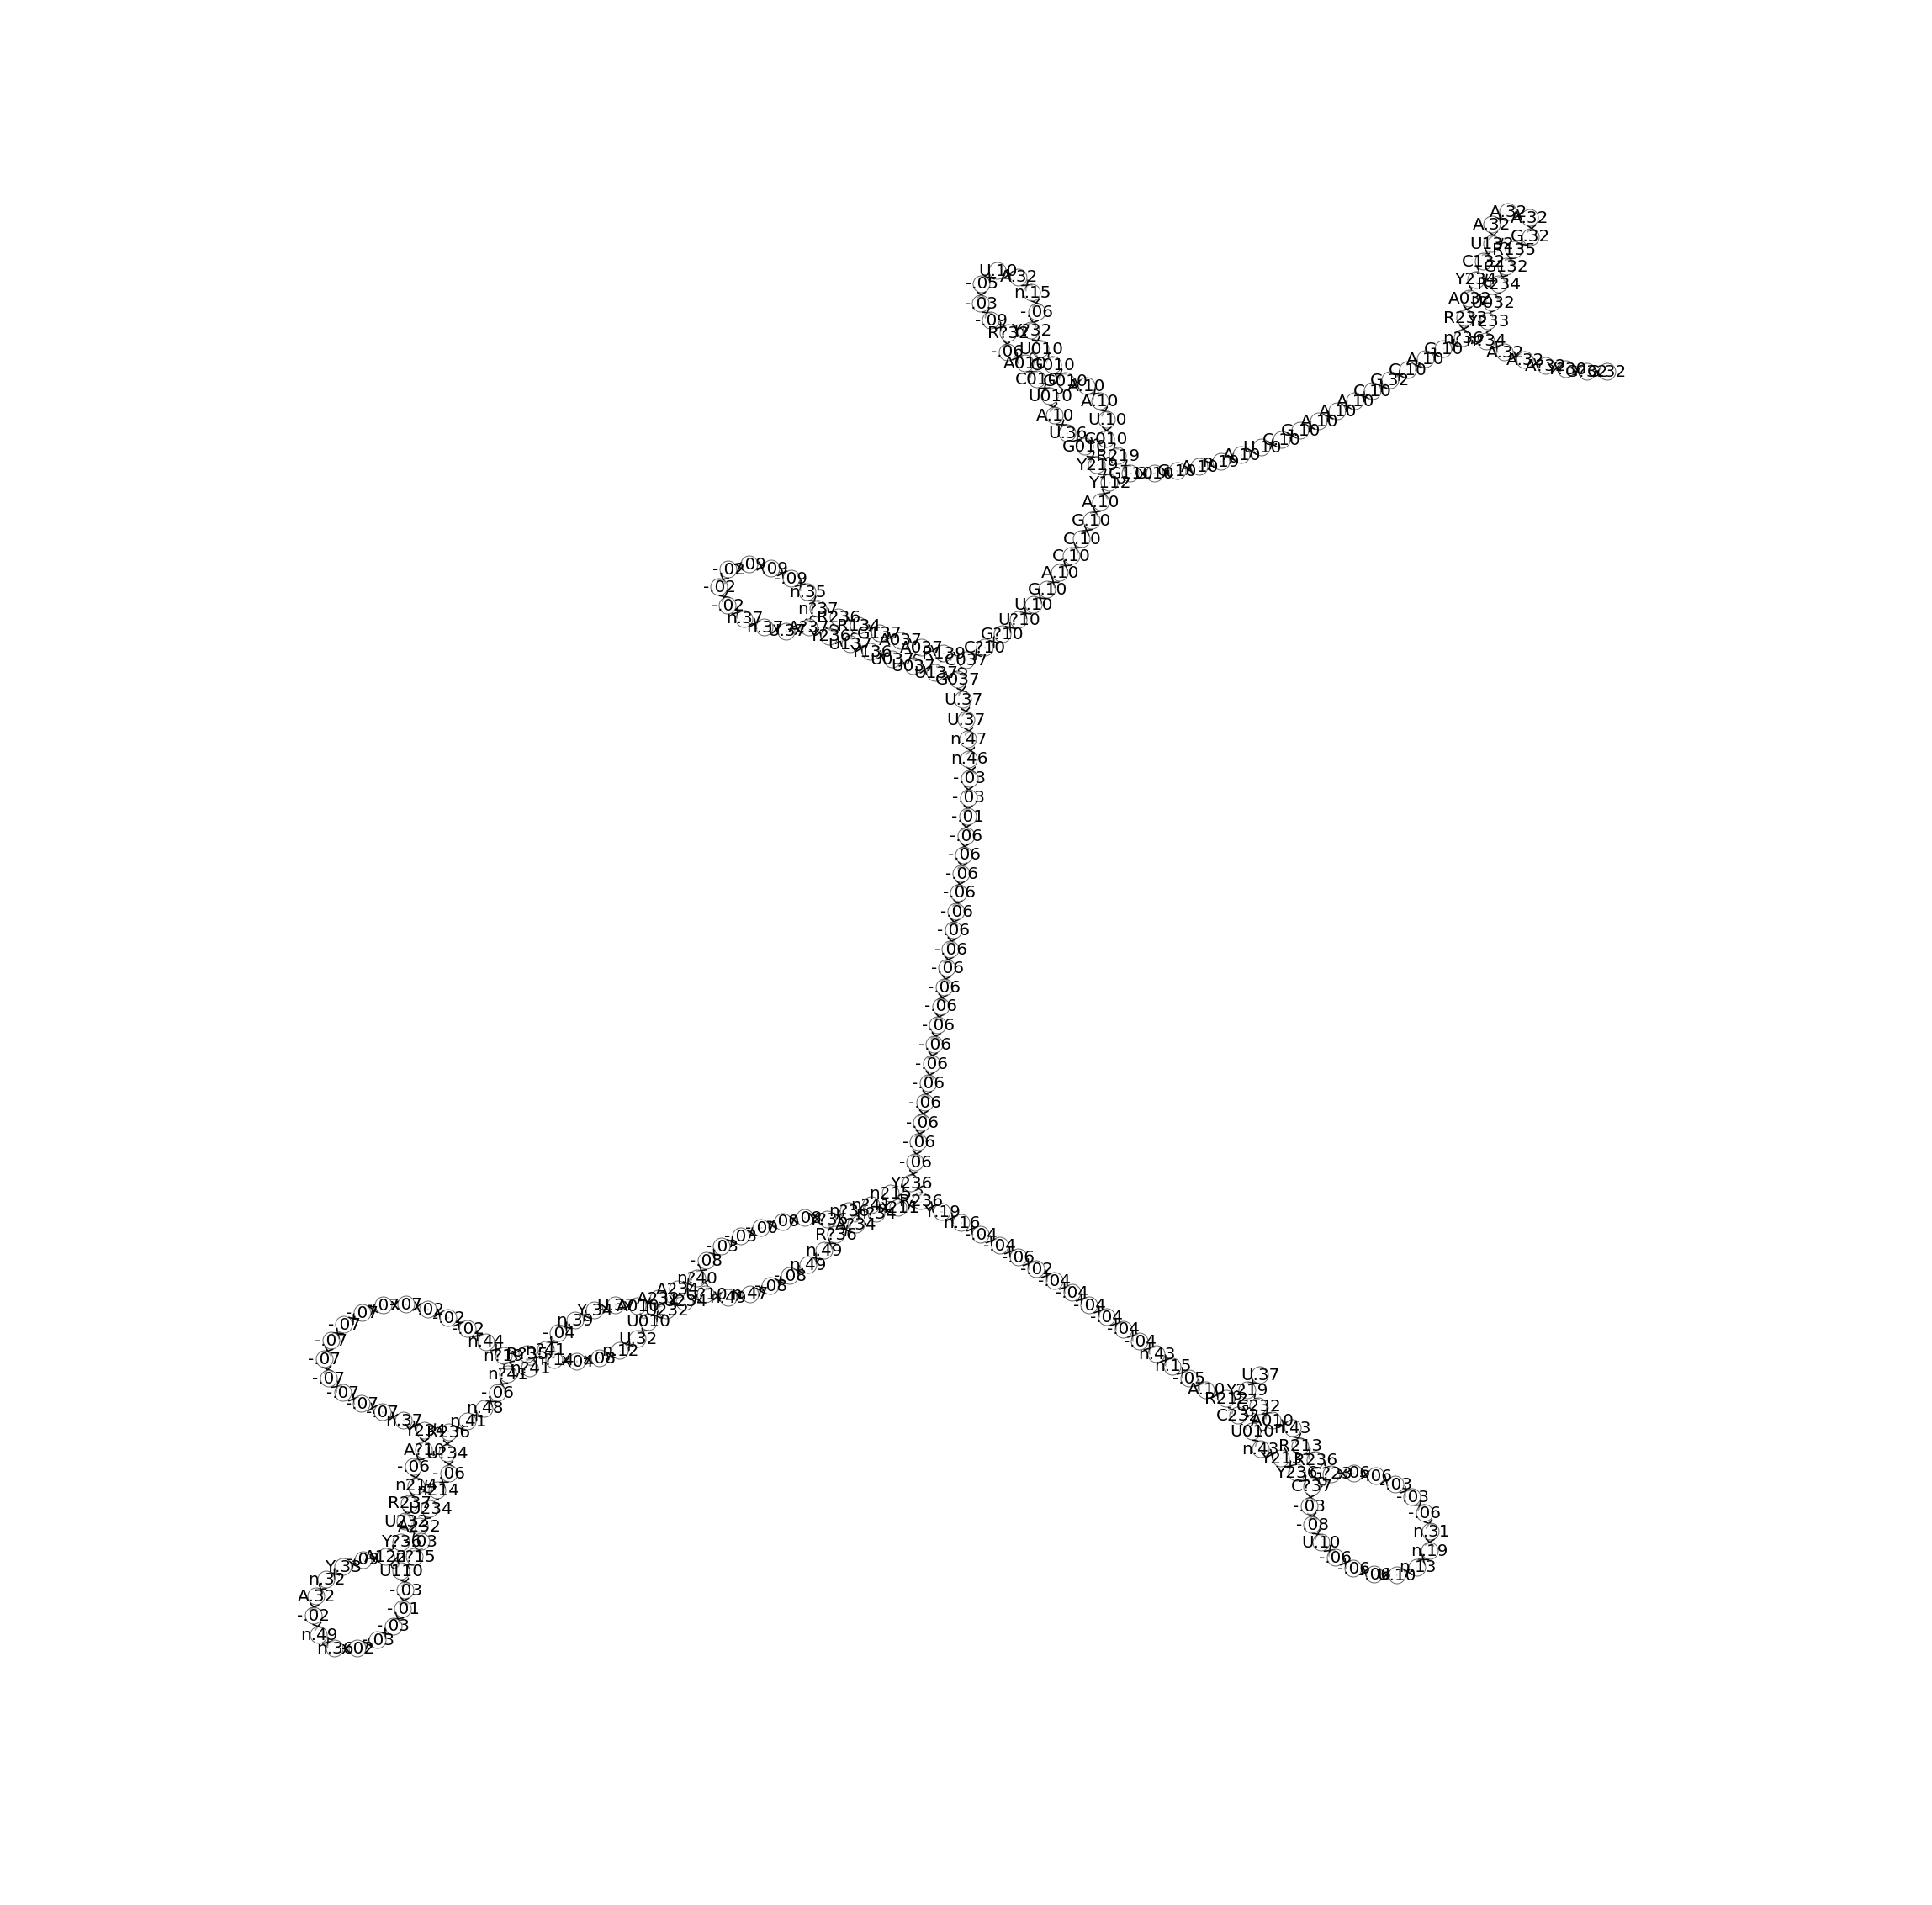

In [ ]:
files_dir = "/home/alsheikm/GitDir/EeDN_work/StoExamples/StoExmapleSmall"
partition_dir = "/home/alsheikm/GitDir/EeDN_work/StoExamples/partitionsFiles"
output_dir = "/home/alsheikm/GitDir/EeDN_work/StoExamples/output"
Folder_to_Graph = _readFolderAndGraphsGenerating(files_dir)
Graph_to_targetFile = _createTargetFiles(files_dir, partition_dir, output_dir)

## Notes: